# Analyse 1

We kunnen ook inzetten op 'Beide teams scoren': Ja of Nee.

We willen daar niet zomaar blindelings op inzetten maar een 'gefundeerde' keuze maken.

Als de roepnamen van 2 clubs worden gegeven, bereken dan hoe vaak de beide teams scoorden in de vroegere duels: Ja of Nee. (inclusief de percentages)

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

C:\Users\Matteo\AppData\Local\Temp\ipykernel_27552\48876594.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Data Frame


In [3]:
# Dataset inladen
data = pd.read_csv("D:/Hogent/Visual Studio Code/DEP/DEP1-2023-2024-groep30/transfermarkt/data/correcte_data/wedstrijden.csv", sep=";")

In [4]:
# De eerste 10 rijen van de dataset bekijken
data.head(10)

,Datum,Tijdstip,Id,StamnummerThuisploeg,RoepnaamThuisploeg,StamnummerUitploeg,RoepnaamUitploeg,FinaleStandThuisploeg,FinaleStandUitploeg,Seizoen,Speeldag
0,1960-09-04,15:00,4008203,373,Sint-Truidense VV,16,Standard Luik,0,2,60/61,1
1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,3,2,60/61,1
2,1960-09-04,15:00,4008205,246,Olympic Charleroi,35,RSC Anderlecht,0,7,60/61,1
3,1960-09-04,15:00,4008206,13,Beerschot,33,Verviétois,1,0,60/61,1
4,1960-09-04,15:00,4008207,3,Club Brugge,10,Union Saint-Gilloise,1,2,60/61,1
5,1960-09-04,15:00,4008208,2,Daring Club Brussel,3434,Patro Eisden,2,1,60/61,1
6,1960-09-04,15:00,4008209,4,RFC Luik,7,KAA Gent,2,1,60/61,1
7,1960-09-04,15:00,4008210,553,Waterschei SV Thor,30,Lierse SK,5,0,60/61,1
8,1960-09-11,15:00,4008218,33,Verviétois,553,Waterschei SV Thor,1,3,60/61,2
9,1960-09-11,15:00,4008217,10,Union Saint-Gilloise,373,Sint-Truidense VV,3,0,60/61,2


In [5]:
# Analyse beide teams scoren
def analyseer_teams(data, team1, team2):
    # Filter de wedstrijden waar beide teams tegen elkaar speelden
    matches = data[((data['RoepnaamThuisploeg'] == team1) & (data['RoepnaamUitploeg'] == team2)) |
                   ((data['RoepnaamThuisploeg'] == team2) & (data['RoepnaamUitploeg'] == team1))]
    
    # Bereken het aantal matchen waar beide teams scoorden
    matches['BeideScoren'] = (matches['FinaleStandThuisploeg'] > 0) & (matches['FinaleStandUitploeg'] > 0)
    
    # Percentage berekenen
    if len(matches) > 0:
        percentage_yes = matches['BeideScoren'].mean() * 100
        aantal_ja = matches['BeideScoren'].sum()
        aantal_nee = len(matches) - aantal_ja
        return {
            'Aantal Wedstrijden': len(matches),
            'Beide Scoren Ja': aantal_ja,
            'Beide Scoren Nee': aantal_nee,
            'Percentage Ja': percentage_yes,
            'Percentage Nee': 100 - percentage_yes
        }
    else:
        return "Geen wedstrijden gevonden tussen deze teams."

In [6]:
# Voorbeeld: Analyseer teams
resultaat = analyseer_teams(data, 'Club Brugge', 'Standard Luik')
print(resultaat)

{'Aantal Wedstrijden': 128, 'Beide Scoren Ja': 68, 'Beide Scoren Nee': 60, 'Percentage Ja': 53.125, 'Percentage Nee': 46.875}


C:\Users\Matteo\AppData\Local\Temp\ipykernel_27552\1327866506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['BeideScoren'] = (matches['FinaleStandThuisploeg'] > 0) & (matches['FinaleStandUitploeg'] > 0)


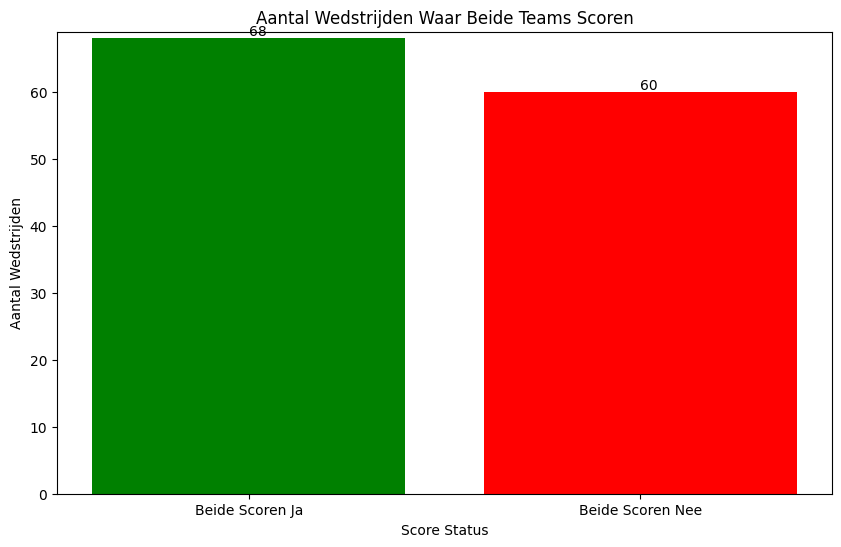

In [8]:
# Controleer of het resultaat wedstrijdinformatie bevat en teken dan een grafiek
if isinstance(resultaat, dict):
    labels = ['Beide Scoren Ja', 'Beide Scoren Nee']
    waarden = [resultaat['Beide Scoren Ja'], resultaat['Beide Scoren Nee']]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, waarden, color=['green', 'red'])
    
    plt.title('Aantal Wedstrijden Waar Beide Teams Scoren')
    plt.xlabel('Score Status')
    plt.ylabel('Aantal Wedstrijden')
    plt.ylim(0, max(waarden) + 1)  # Zorg voor voldoende ruimte boven de bars

    # Voeg numerieke labels toe boven elke staaf
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # Center the text vertically just above the bar

    plt.show()
else:
    print("Geen grafiek beschikbaar: " + resultaat)
